### Question 1
**What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**

Ensemble techniques combine multiple models to improve performance. Bagging trains models independently on random subsets to reduce variance, while boosting trains models sequentially to reduce bias by correcting previous errors.

### Question 2
**Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**

Random Forest reduces overfitting by averaging multiple decision trees trained on bootstrapped samples. Key hyperparameters include `n_estimators` (number of trees) and `max_features` (features per split).

### Question 3
**What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**

Stacking combines predictions from multiple models using a meta-model. Unlike bagging/boosting, stacking uses heterogeneous models. Example: combining SVM, Decision Tree, and Logistic Regression for classification.

### Question 4
**What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**

OOB (Out-of-Bag) score uses samples not included in bootstrap for validation, providing an unbiased evaluation without needing a separate validation set.

### Question 5
**Compare AdaBoost and Gradient Boosting in terms of error handling, weight adjustment, and use cases.**

| Feature | AdaBoost | Gradient Boosting |
|--------|----------|-------------------|
| Error Handling | Focuses on misclassified samples | Minimizes loss function |
| Weight Adjustment | Increases weights of errors | Uses gradients |
| Use Cases | Binary classification | Regression, classification |

### Question 6
**Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**

CatBoost uses ordered target statistics and efficient encoding to handle categorical features without one-hot encoding, avoiding target leakage and improving performance.

In [5]:
# Question 7: KNN Classifier on Wine Dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train KNN without scaling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Without Scaling:", classification_report(y_test, y_pred))

# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN with scaling
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
print("With Scaling:", classification_report(y_test, y_pred_scaled))

# GridSearchCV for best K and metric
param_grid = {'n_neighbors': list(range(1, 21)), 'metric': ['euclidean', 'manhattan']}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("Best Parameters:", grid.best_params_)

# Optimized KNN
best_knn = grid.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print("Optimized KNN:", classification_report(y_test, y_pred_best))

Without Scaling:               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.75      0.71      0.73        21
           2       0.53      0.57      0.55        14

    accuracy                           0.74        54
   macro avg       0.73      0.73      0.73        54
weighted avg       0.74      0.74      0.74        54

With Scaling:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.90      0.95        21
           2       0.93      1.00      0.97        14

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 1}
Optimized KNN:               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00 

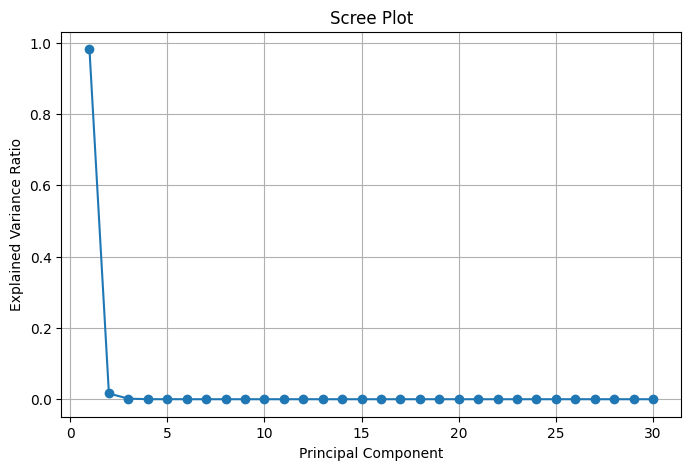

Original Data Accuracy: 0.9590643274853801
PCA Data Accuracy: 0.9649122807017544


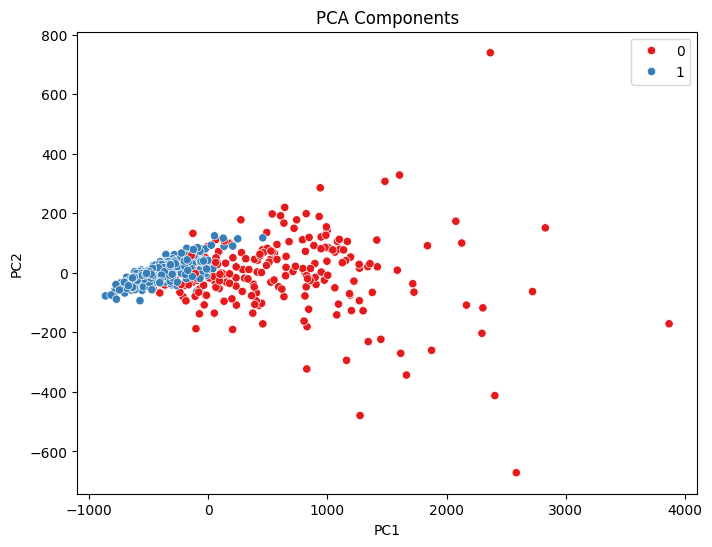

In [7]:
# Question 8: PCA + KNN on Breast Cancer Dataset
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# PCA
pca = PCA()
pca.fit(X)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Retain 95% variance
pca_95 = PCA(n_components=2)
X_pca = pca_95.fit_transform(X)

# Train KNN on original and PCA data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42)

knn_orig = KNeighborsClassifier()
knn_orig.fit(X_train, y_train)
print("Original Data Accuracy:", knn_orig.score(X_test, y_test))

knn_pca = KNeighborsClassifier()
knn_pca.fit(X_pca_train, y_train)
print("PCA Data Accuracy:", knn_pca.score(X_pca_test, y_test))

# Scatter plot of first two components
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='Set1')
plt.title('PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

MSE Euclidean: 7911.2071814937235
MSE Manhattan: 9304.780787712363


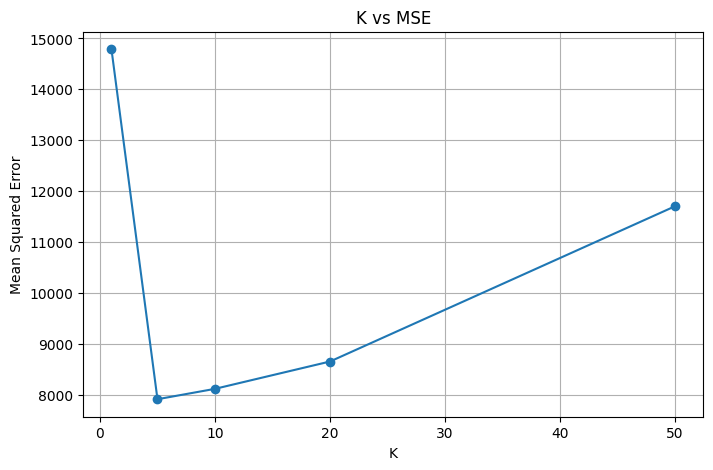

In [8]:
# Question 9: KNN Regressor with Distance Metrics
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Generate dataset
X, y = make_regression(n_samples=500, n_features=10, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Euclidean and Manhattan
knn_euc = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn_euc.fit(X_train, y_train)
mse_euc = mean_squared_error(y_test, knn_euc.predict(X_test))

knn_man = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_man.fit(X_train, y_train)
mse_man = mean_squared_error(y_test, knn_man.predict(X_test))

print("MSE Euclidean:", mse_euc)
print("MSE Manhattan:", mse_man)

# K vs MSE plot
mse_values = []
k_values = [1, 5, 10, 20, 50]
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    mse = mean_squared_error(y_test, knn.predict(X_test))
    mse_values.append(mse)

plt.figure(figsize=(8,5))
plt.plot(k_values, mse_values, marker='o')
plt.title('K vs MSE')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

In [9]:
# Question 10: KNN with KD-Tree/Ball Tree and Imputation
import time
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Load Pima Indians Diabetes dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df = pd.read_csv(url, names=columns)

# Impute missing values
imputer = KNNImputer()
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_imputed = imputer.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.3, random_state=42)

# Brute-force
start = time.time()
knn_brute = KNeighborsClassifier(algorithm='brute')
knn_brute.fit(X_train, y_train)
acc_brute = knn_brute.score(X_test, y_test)
end = time.time()
print("Brute-force Accuracy:", acc_brute, "Time:", end-start)

# KD-Tree
start = time.time()
knn_kd = KNeighborsClassifier(algorithm='kd_tree')
knn_kd.fit(X_train, y_train)
acc_kd = knn_kd.score(X_test, y_test)
end = time.time()
print("KD-Tree Accuracy:", acc_kd, "Time:", end-start)

# Ball Tree
start = time.time()
knn_ball = KNeighborsClassifier(algorithm='ball_tree')
knn_ball.fit(X_train, y_train)
acc_ball = knn_ball.score(X_test, y_test)
end = time.time()
print("Ball Tree Accuracy:", acc_ball, "Time:", end-start)

Brute-force Accuracy: 0.6883116883116883 Time: 0.028760194778442383
KD-Tree Accuracy: 0.6883116883116883 Time: 0.006940364837646484
Ball Tree Accuracy: 0.6883116883116883 Time: 0.009583234786987305
